# Task 1: Define the Architecture of the ANN Model

In this notebook, we will define the architecture of the Artificial Neural Network (ANN) model based on the features in our dataset. 
We will:
1. Check if the model architecture file (`ann_architecture.json`) exists.
2. Load and compile the model if the architecture file is found.
3. Print the model architecture.


In [1]:
import os
import json
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore # type: ignore
import tensorflow as tf
import matplotlib.pyplot as plt


# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Print the current working directory for debugging
print(f"Current working directory: {os.getcwd()}")

# Ensure the utils module can be found
notebook_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
utils_path = os.path.join(project_root, 'utils')

print(f"Notebook directory: {notebook_dir}")
print(f"Project root: {project_root}")
print(f"Utils path: {utils_path}")

# Load configuration
config_path = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath('')), '..', 'config.json'))
print(f"Config path: {config_path}")
with open(config_path, 'r') as f:
    config = json.load(f)

# Base directory: the root of your project
base_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))

# Convert relative paths from config to absolute paths
ann_architecture_path = os.path.join(base_dir, config['ann_architecture_path'])
train_data_path = os.path.join(base_dir, config['train_data_path'])
print(f"ANN Architecture Path: {ann_architecture_path}")

# Check for Model Architecture JSON
architecture_file_path = os.path.join(ann_architecture_path, 'ann_architecture.json')

# Print the constructed path for debugging
print(f"Looking for architecture file at: {architecture_file_path}")

# Check if the architecture file exists
if os.path.exists(architecture_file_path):
    print(f"Model architecture file found at {architecture_file_path}. Loading the model architecture...")
else:
    raise FileNotFoundError(f"Model architecture file not found at {architecture_file_path}. Please ensure the file is in the correct location.")


Current working directory: d:\Customer-Churn-Analysis\notebooks\predictive_modeling
Notebook directory: d:\Customer-Churn-Analysis\notebooks
Project root: d:\Customer-Churn-Analysis
Utils path: d:\Customer-Churn-Analysis\utils
Config path: d:\Customer-Churn-Analysis\config.json
ANN Architecture Path: d:\Customer-Churn-Analysis\Predictive_Modeling/ann_architecture
Looking for architecture file at: d:\Customer-Churn-Analysis\Predictive_Modeling/ann_architecture\ann_architecture.json
Model architecture file found at d:\Customer-Churn-Analysis\Predictive_Modeling/ann_architecture\ann_architecture.json. Loading the model architecture...


## Check for Existing Model Architecture

Next, we check if the model architecture file (`ann_architecture.json`) exists. 
If the file is found, we load and print the model architecture. 
If not, we will raise an error, as this notebook is only for loading an existing model architecture.


In [2]:
# Define the file path for the model architecture
architecture_file_path = os.path.join(ann_architecture_path, 'ann_architecture.json')

# Print the constructed path for debugging
print(f"Looking for architecture file at: {architecture_file_path}")

# Check if the architecture file exists
if os.path.exists(architecture_file_path):
    print(f"Model architecture file found at {architecture_file_path}. Loading the model architecture...")
else:
    raise FileNotFoundError(f"Model architecture file not found at {architecture_file_path}. Please ensure the file is in the correct location.")


Looking for architecture file at: d:\Customer-Churn-Analysis\Predictive_Modeling/ann_architecture\ann_architecture.json
Model architecture file found at d:\Customer-Churn-Analysis\Predictive_Modeling/ann_architecture\ann_architecture.json. Loading the model architecture...


## Load and Compile Model

If the model architecture file exists, we will load it and compile the model. 
This step ensures that the notebook only loads the predefined architecture without creating a new one.


In [3]:
from tensorflow.keras.models import model_from_json # type: ignore

# Load the model architecture from the JSON file
with open(architecture_file_path, 'r') as json_file:
    loaded_model_json = json_file.read()

model = model_from_json(loaded_model_json)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Model loaded and compiled successfully.")


Model loaded and compiled successfully.


## Display Model Summary

Finally, we will display the summary of the loaded model to verify its architecture.


In [4]:
# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15

# Task 2: Train the Model and Optimize Convergence



In this task, we will use the trained model to optimize its convergence and prevent overfitting. Since we have already trained the model and have the training results, we will load the existing model and display relevant results.



In [5]:
# Define the path for the trained model and training results
trained_model_path = os.path.join(project_root, 'Predictive_Modeling', 'trained_model', 'best_model.h5')
training_results_path = os.path.join(project_root, 'Predictive_Modeling', 'results', 'training_results.csv')
visualization_path = os.path.join(project_root, 'Predictive_Modeling', 'visualizations', 'training_visualization.png')

# Check if the trained model and training results exist
if os.path.exists(trained_model_path) and os.path.exists(training_results_path):
    print("Trained model and training results found.")
else:
    print("Trained model or training results not found. Please ensure the files are in the correct location.")

Trained model and training results found.


- This cell checks if the trained model (best_model.h5) and the training results (training_results.csv) exist in the specified paths. If both files are found, it confirms their existence; otherwise, it alerts the user to check the file paths.



In [6]:
# Load and display a few rows of the training results
if os.path.exists(training_results_path):
    training_results = pd.read_csv(training_results_path)
    print("Training Results:")
    print(training_results.head())  # Display the first few rows of the training results
else:
    print("Training results file not found.")


Training Results:
        loss  accuracy  val_loss  val_accuracy
0  16.759356  0.629022  1.560171      0.756877
1   1.431723  0.688263  0.556894      0.778172
2   0.686641  0.719769  0.543785      0.782609
3   0.602814  0.724651  0.493414      0.783496
4   0.550449  0.757045  0.558732      0.781721


This cell loads the training results from the training_results.csv file and displays the first few rows. This allows us to inspect the performance metrics of the trained model.



Expected visualization path: d:\Customer-Churn-Analysis\Predictive_Modeling\visualization\training_visualization.png


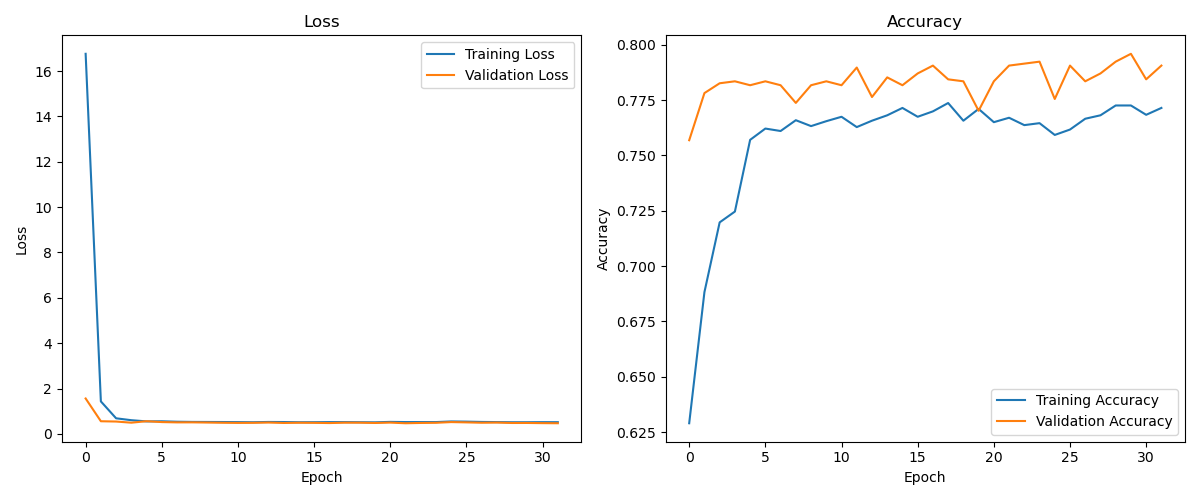

In [7]:
# Reload the visualization path
visualization_path = os.path.join(project_root, 'Predictive_Modeling', 'visualization', 'training_visualization.png')

# Debugging: Print the visualization path to ensure it is correct
print(f"Expected visualization path: {visualization_path}")

# Check for and display the training visualization if it exists
if os.path.exists(visualization_path):
    from IPython.display import Image
    display(Image(filename=visualization_path))
else:
    print("Training visualization file not found.")
